# Tester File - Sep 10 2005
## Learning to Code, testing out maps

## Importing data

In [4]:
import pandas as pd
df = pd.read_csv('data/A20050910 (2).loc', header = 0 , names = ['Year/Mo/Da', 'Hr:Mn:Sec.fract', 'Lat' , 'Long' ,'Resid', 'Nsta'])
df 

,Year/Mo/Da,Hr:Mn:Sec.fract,Lat,Long,Resid,Nsta
0,2005/09/10,00:00:02.097864,15.2479,81.4838,19.0,5
1,2005/09/10,00:00:02.868700,25.5625,-69.3152,11.4,5
2,2005/09/10,00:00:03.488274,24.8837,-69.7021,11.9,5
3,2005/09/10,00:00:05.778437,-39.7103,147.2434,11.7,6
4,2005/09/10,00:00:05.835070,-39.4917,147.2245,9.7,5
...,...,...,...,...,...,...
127803,2005/09/10,23:59:54.644459,7.6197,-76.0067,17.6,6
127804,2005/09/10,23:59:54.127925,7.0555,-76.4211,13.3,5
127805,2005/09/10,23:59:54.232164,7.6379,-75.9789,14.1,8
127806,2005/09/10,23:59:55.464399,6.8898,-66.2331,14.7,5


## Maps, seperated

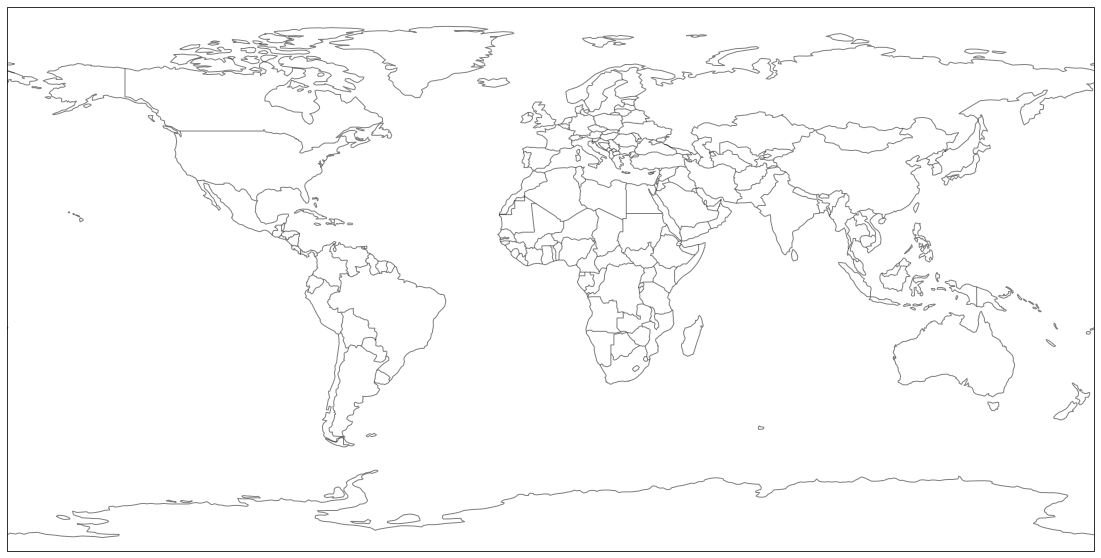

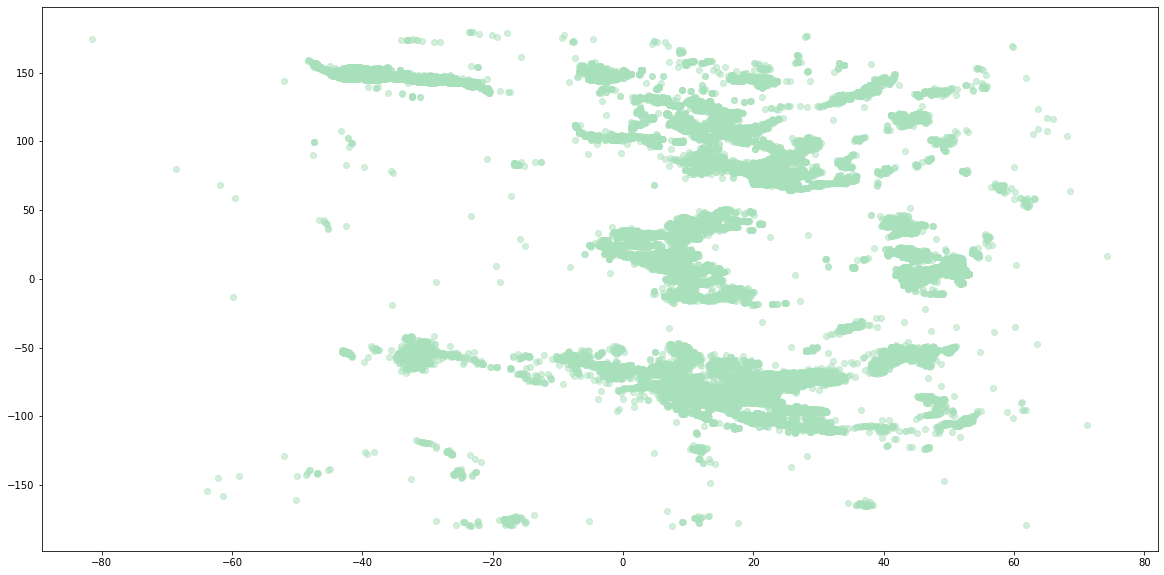

In [3]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt


ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)


# Make figure larger
plt.gcf().set_size_inches(20, 10)

N = int
x = df["Lat"]
y = df['Long']

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=None, c=['#A8E0BB'] , alpha=0.5)


## map! 

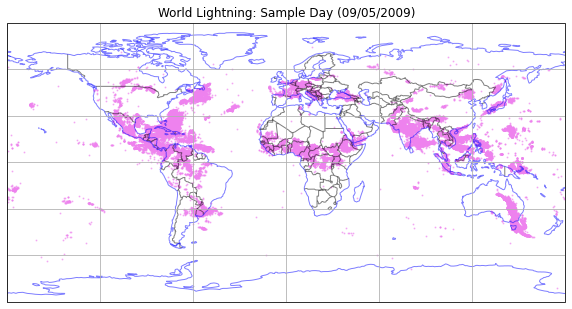

In [8]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5, edgecolor="black")
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5, edgecolor='blue')

ax.gridlines()
plt.title("World Lightning")
plt.scatter(x=df["Long"], y=df['Lat'],
            color="violet",
            s=1,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

plt.savefig("Worldlightning", dpi = 200)
plt.show()

## Using Latitude & Longitude Box to Show a Particular Area of Map 
- We can call method named set_extent() on axes object passing it latitude and longitudes of the area to be covered.
- We can also call set_xlim() and set_ylim() methods passing them longitude and latitude limits respectively.

### trying to find BC

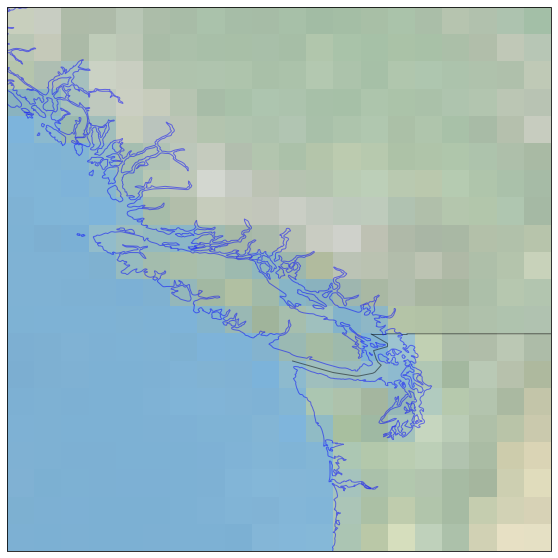

In [5]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5, edgecolor="black")
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5, edgecolor='blue')


lat1, lon1, lat2, lon2 = -45, -100, -55, -140
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

ax.set_xlim(-130, -120)
ax.set_ylim(45, 55)
plt.savefig("basicmap", dpi = 200)
plt.show()

## to do 
- grab lat and long values within a certain region 
- make an area with lat and long 
- lat() = lat > 50.0 ?? 
- grab data points that fit within that range from arrays 
- lat[lat>50]
- world lightning map over a region 
- change colors or sizes based on intensity 
- photo and map ? 
- make one map per hour of the day for dataset

us_statewise_lat_lon = starbucks_us.groupby(by="State/Province").mean()[["Longitude", "Latitude"]]
look up group by function, maybe be able plot lat and lon, filter out data 

(127808,)
(127808,)


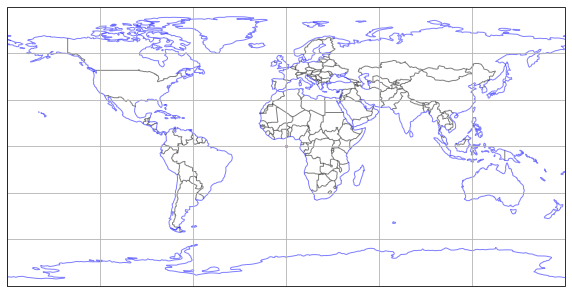

In [53]:
#x = df.loc[(df.Long > -130) & (df.Long < -120), 'Long'] 
#y = df.loc[(df.Lat > 44) & (df.Lat < 46), 'Lat'] 

print(x.shape) 
print(y.shape)

fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5, edgecolor="black")
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5, edgecolor='blue')

ax.gridlines()

plt.scatter(x = (df['Long'] > -120) & (df['Long'] < -130), y = (df['Lat'] > 46) & (df["Lat"] < 44),
            color="violet",
            s=1,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

plt.show()

(10, 6)
        Year/Mo/Da  Hr:Mn:Sec.fract      Lat      Long  Resid  Nsta
577     2005/09/10  00:06:11.693768  44.4115 -122.2814   13.4     5
4741    2005/09/10  00:52:19.773024  46.5794 -122.0545   26.3     5
6902    2005/09/10  01:17:39.975407  43.8561 -122.0962   15.1     5
7162    2005/09/10  01:20:36.491272  46.9183 -122.2728   29.9     5
13806   2005/09/10  02:47:19.684725  46.9503 -122.0567   14.1     5
105487  2005/09/10  19:02:25.179797  46.9869 -123.2510   22.1     6
112178  2005/09/10  20:32:14.743211  46.6784 -123.8291   16.3     5
112875  2005/09/10  20:40:12.242539  46.3520 -123.3842    8.3     5
125686  2005/09/10  23:30:33.970142  46.2424 -123.9962   25.3     5
126301  2005/09/10  23:37:49.317580  46.3907 -123.9993   12.2     5


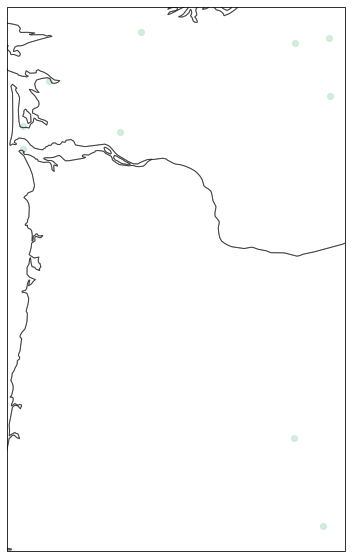

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
plt.gcf().set_size_inches(20, 10)

N = int
points = (df.loc[(df.Long > -147) & (df.Long < -117) & (df.Lat > 43) & (df.Lat < 110)])
#y = df.loc[(df.Lat > 44) & (df.Lat < 46), 'Lat'] 

print(points.shape)
print(points)

plt.scatter(points["Long"], points["Lat"], s=None, c=['#A8E0BB'] , alpha=0.5)

plt.show()

### Geospatial data for each state 

In [58]:
## Below step will get us geospatial data for each state.
province_long = df.groupby(by="Long").mean()[(df.Long > -130) & (df.Long < -120)]
province_lat = df.groupby(by="Lat").mean()[(df.Lat > 44) & (df.Lat < 46)]

## Below step will get us store count per state.
long_count = df.groupby(by="Long").count()[['Hr:Mn:Sec.fract']].rename(columns={"Long":"Count"})
lat_count = df.groupby(by="Lat").count()[['Hr:Mn:Sec.fract']].rename(columns={"Lat":"Count"})

## Below step will merge store counts dataframe with geospatial dataframe.
statewise_store_count = us_statewise_lat_lon.join(statewise_store_count).reset_index()

statewise_store_count.head()

'## Below step will get us geospatial data for each state.\nprovince_long = df.groupby(by="Long").mean()[(df.Long > -130) & (df.Long < -120)]\nprovince_lat = df.groupby(by="Lat").mean()[(df.Lat > 44) & (df.Lat < 46)]\n\n## Below step will get us store count per state.\nlong_count = df.groupby(by="Long").count()[[\'Hr:Mn:Sec.fract\']].rename(columns={"Long":"Count"})\nlat_count = df.groupby(by="Lat").count()[[\'Hr:Mn:Sec.fract\']].rename(columns={"Lat":"Count"})\n\n## Below step will merge store counts dataframe with geospatial dataframe.\nstatewise_store_count = us_statewise_lat_lon.join(statewise_store_count).reset_index()\n\nstatewise_store_count.head()'

### Trying 'grouped' function

127808
127808


NameError: name 'grouped' is not defined

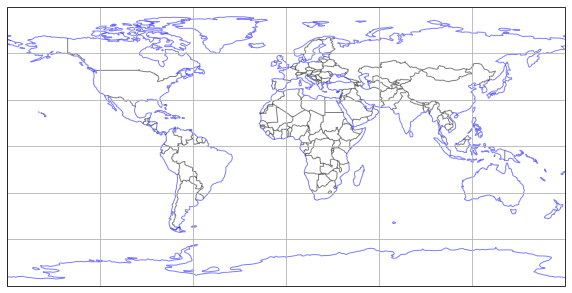

In [35]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5, edgecolor="black")
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5, edgecolor='blue')

ax.gridlines()


print(len(df.Long))
print(len(df.Lat))

"""if df.Long.all() >= 0: 
    c = 'violet'
elif df.Long.all() < 0: 
    c= "blue"
    
if df.Lat.all() >= 0: 
    c = 'green'
elif df.Lat.all()< 0: 
    c = 'red'"""

colors = {'Lat': 'red', 'Long': 'blue'}

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= df["Long"], y= df["Lat"], label=key, color=colors[key])


plt.show()

KeyError: 'continent'

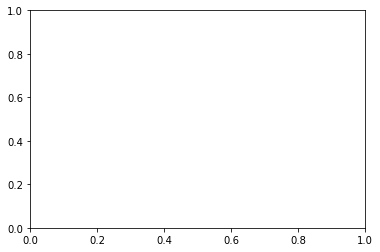

In [36]:
fig, ax = plt.subplots()

colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}

grouped = df.groupby('continent')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='population', y='Area', label=key, color=colors[key])

plt.show()

### google calender invite

# to do 
- same plot over BC for summer event 
- check format, change date or what not 
- first plot all data for all time
- currently plotting all data, find how to filter out time - plot for just a few hours 
- reference satelite animation for start and time for BC 
- put colors or size as function of intensity 
- the intensity is not in the text files, ask jacob if these are the correct files 
- need AE files instead of the A files 

- loop through times for in increment, filter a specific time interval 
- plot the visible imagery 
- look at lauras image
- emails of laura 

- once mapping is down, set a subdomain to create a time series (5 or 10 min intervals), series of number of series etc. to see how event developed
- filter on space, start time end time, count number of strikes for time series plot 

- use polygon to define area instead of square 